<a href="https://colab.research.google.com/github/varunsawhney8/Projects/blob/main/NewsClassification_2nddraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Project: Sentiment Analysis 

# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import string
import re
from os import listdir
from nltk.corpus import stopwords
!pip install newspaper3k
from newspaper import Article
import numpy as np
import nltk




     |████████████████████████████████| 211 kB 8.6 MB/s 
     |████████████████████████████████| 87 kB 8.2 MB/s 
     |████████████████████████████████| 81 kB 13.3 MB/s 
     |████████████████████████████████| 7.4 MB 22.3 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=5c4952f2961e3245c10ba8481b12ae5fb8a0223baf30cd3db2a0e25c4c73910a
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=29df62c192dbd3628b1c7c243533fb89976d9abd52cdc43e865f02a90ee4e793
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=91af19ea5440067c5e754e9d814091a7f3c672e626699a64942d418b2f87b92d
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

In [4]:
# b) Load dataset

path='/content/Reliance_Final_Ndtv_data4.xlsx'
data=pd.read_excel(path)

data=data[::-1].reset_index()
data.drop(columns=['index'],axis=True,inplace=True)

path='/content/Reliance_Nse_data2.csv'
data1=pd.read_csv(path)

In [5]:
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

data.head()

,Date,Media,Title,Article,Keywords
0,2020-07-16,NDTV.com,Reliance's Stake Sale Talks With Saudi Aramco ...,Reliance Industries shares extended losses on ...,"['report', 'sale', 'industries', 'talks', 'rel..."
1,2020-07-17,NDTV.com,Reliance To Shut Crude Refining Unit For Maint...,Reliance will shut one of its refining units i...,"['bpd', 'exportfocused', 'reliance', 'week', '..."
2,2020-07-20,NDTV.com,Reliance-Google Smartphone Deal in India Threa...,"A $4.5 billion (Rs. 33,737 crores in India) de...","['threatens', 'india', 'jio', 'smartphone', 't..."
3,2020-07-21,NDTV.com,"Netflix, Amazon, Facebook Stocks Draw In Amate...",The S&P BSE Sensex remains in the red for the ...,"['stocks', 'india', 'overseas', 'amazon', 'wor..."
4,2020-07-21,NDTV.com,JioMart App for Android and iOS Launched: Here...,"JioMart, the online grocery service operated b...","['payment', 'heres', 'india', 'services', 'ios..."


In [6]:
data.drop(columns=['Media','Article','Keywords'],inplace=True,axis=1)
data.columns

Index(['Date', 'Title'], dtype='object')

In [7]:
data1.head()

,Date,Close
0,2020-07-16,1843.400024
1,2020-07-17,1911.699951
2,2020-07-20,1919.900024
3,2020-07-21,1971.550049
4,2020-07-22,2004.000000


In [8]:
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms
import nltk
nltk.download('stopwords')
list1=[]
list1=data['Title']

for i in range(len(list1)):               
    tokens = list1[i].split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    list1[i] = ' '.join(tokens)

data['Title']=list1
del list1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
# 4. Evaluate Algorithms
# a) Split-out validation dataset- train_test_split
# b) Test options and evaluation metric- Confusion matrix, accuracy, precision,recall, f measure
# c) Spot Check Algorithms- Unsupervised [Textblob, Vader, LM Dictionary,FINBERT], Supervised-[Bert]
# d) Compare Algorithms


**MODEL:**
1. FINBERT

In [10]:
!pip install transformers
from transformers import pipeline
classifier = pipeline('sentiment-analysis', model="ProsusAI/finbert")
list3=[]

for i in range(len(data['Title'])):
    a=(classifier(data['Title'][i]))
    a=a[0]
    a=list(a.values())[0]
    label_f={'positive':1,'negative':2,'neutral':0}
    list3.append(label_f[a])

data['1day_sentiment']=list3

del list3

     |████████████████████████████████| 2.6 MB 8.7 MB/s 
     |████████████████████████████████| 636 kB 70.6 MB/s 
     |████████████████████████████████| 3.3 MB 28.2 MB/s 
     |████████████████████████████████| 895 kB 77.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [11]:
data.head()

,Date,Title,1day_sentiment
0,2020-07-16,Reliances Stake Sale Talks With Saudi Aramco S...,2
1,2020-07-17,Reliance To Shut Crude Refining Unit For Maint...,2
2,2020-07-20,RelianceGoogle Smartphone Deal India Threatens...,2
3,2020-07-21,Netflix Amazon Facebook Stocks Draw In Amateur...,1
4,2020-07-21,JioMart App Android iOS Launched Heres How It ...,0


**VISUALIZATION:**
1. PIE Chart
2. WORD Cloud

In [12]:
pos=[]
neg=[]
neutral=[]

# Data Divide into segments

for i in range(len(data)):
    if data['1day_sentiment'][i]=='negative':
        pos.append(data['Title'][i])
    elif data['1day_sentiment'][i]=='positive':
        neg.append(data['Title'][i])
    else:
        neutral.append(data['Title'][i])



139

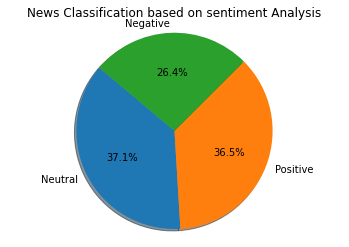

In [33]:
import matplotlib.pyplot as plt
labels = ['Neutral', 'Positive','Negative']
sizes = [data['1day_sentiment'].value_counts()[0],data['1day_sentiment'].value_counts()[1],data['1day_sentiment'].value_counts()[2]]
# Plot
plt.title('News Classification based on sentiment Analysis')
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [25]:
from collections import Counter
vocab=Counter()


vocab_pos=[]

for i in range(len(pos)):
    tokens=pos[i].split()
    for j in tokens:
        vocab_pos.append(j)

vocab_neg=[]

for i in range(len(neg)):
    tokens=neg[i].split()
    for j in tokens:
        vocab_neg.append(j)

vocab_neutral=[]

for i in range(len(neutral)):
    tokens=neutral[i].split()
    for j in tokens:
        vocab_neutral.append(j)


vocab.update(vocab_pos)
vocab.update(vocab_neutral)

vocab.update(vocab_neg)


vocab.most_common(50)

[('Reliance', 238),
 ('Industries', 145),
 ('To', 125),
 ('Sensex', 105),
 ('In', 94),
 ('Nifty', 86),
 ('Retail', 58),
 ('Points', 55),
 ('Over', 53),
 ('Deal', 47),
 ('By', 45),
 ('For', 43),
 ('On', 43),
 ('Rs', 41),
 ('Mukesh', 38),
 ('Future', 38),
 ('Stocks', 37),
 ('Ambani', 35),
 ('Amazon', 34),
 ('Crore', 34),
 ('Gains', 31),
 ('Led', 30),
 ('As', 29),
 ('With', 28),
 ('Watch', 26),
 ('India', 25),
 ('Stake', 24),
 ('Report', 22),
 ('After', 22),
 ('Shares', 20),
 ('Bank', 19),
 ('Above', 19),
 ('Jio', 18),
 ('From', 17),
 ('Group', 17),
 ('Court', 16),
 ('Billion', 15),
 ('Quarter', 14),
 ('Market', 14),
 ('Record', 14),
 ('Says', 14),
 ('Rises', 14),
 ('Tata', 14),
 ('HDFC', 13),
 ('Higher', 13),
 ('Focus', 13),
 ('Nearly', 12),
 ('Of', 12),
 ('Dragged', 12),
 ('Arm', 12)]

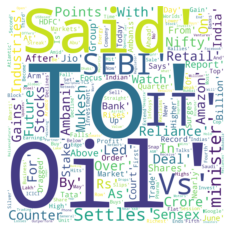

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI',"n'", "hi"]
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)
text = str(vocab)
wordcloud = WordCloud(width = 1800, height = 1800, 
                background_color ='white', 
                max_words=200,
                stopwords = stopwords, 
                min_font_size = 10).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



#5. Business Problem Analysis
    A. Sentiment Meter
    B. Price Movement analysis based on Sentiment meter

In [ ]:
aggregation_functions = {'Title': 'first', '1day_sentiment': 'max'}
data = data.groupby(data['Date']).aggregate(aggregation_functions)
data.reset_index( inplace=True)
data['Date']=pd.to_datetime(data['Date']).dt.date
data['1day_sentiment']=data['1day_sentiment'].astype('float')

In [ ]:
data['3day_sentiment'] = round(data['1day_sentiment'].ewm(span=3).mean())
data['7day_sentiment'] = round(data['1day_sentiment'].ewm(span=7).mean())
data['15day_sentiment'] = round(data['1day_sentiment'].ewm(span=15).mean())
data.head()

,Date,Title,1day_sentiment,3day_sentiment,7day_sentiment,15day_sentiment
0,2020-07-16,Reliance's Stake Sale Talks With Saudi Aramco ...,2.0,2.0,2.0,2.0
1,2020-07-17,Reliance To Shut Crude Refining Unit For Maint...,2.0,2.0,2.0,2.0
2,2020-07-20,Reliance-Google Smartphone Deal in India Threa...,2.0,2.0,2.0,2.0
3,2020-07-21,"Netflix, Amazon, Facebook Stocks Draw In Amate...",1.0,1.0,2.0,2.0
4,2020-07-22,Reliance Industries Postpones June Quarter Res...,2.0,2.0,2.0,2.0


In [ ]:
data.columns

Index(['Date', 'Title', 'finbert', '3day_sentiment', '7day_sentiment',
       '15day_sentiment'],
      dtype='object')

In [ ]:
data1['Date']=pd.to_datetime(data1['Date']).dt.date
data1['perc_change1'] =data1['Close'].pct_change(periods=1)*100
#data1['perc_change3'] =data1['Close'].pct_change(periods=2)*100
#data1['perc_change7'] =data1['Close'].pct_change(periods=6)*100
data1.head()

,Date,Close,perc_change1
0,2020-07-16,1843.400024,NaN
1,2020-07-17,1911.699951,3.705106
2,2020-07-20,1919.900024,0.428941
3,2020-07-21,1971.550049,2.690246
4,2020-07-22,2004.000000,1.645911


In [ ]:
data2.columns

Index(['Date', '1day_sentiment', '3day_sentiment', '7day_sentiment',
       '15day_sentiment', 'perc_change1'],
      dtype='object')

In [ ]:
data2=data.drop(columns=['Title'],axis=1)
data2["perc_change1"]=[np.nan for i in range(len(data))]
label={0: 'Neutral',1:'Positive',2:'Negative'}
data2['1day_sentiment']=[label[data2['1day_sentiment'][i]]for i in range(len(data2))]
data2['3day_sentiment']=[label[data2['3day_sentiment'][i]]for i in range(len(data2))]
data2['7day_sentiment']=[label[data2['7day_sentiment'][i]]for i in range(len(data2))]
data2['15day_sentiment']=[label[data2['15day_sentiment'][i]]for i in range(len(data2))]

In [ ]:
for i in range(len(data2)):
  for j in range(len(data1)):
    if data['Date'][i]==data1['Date'][j]:
      data2['perc_change1'][i]=data1['perc_change1'][j+1]
  count=0
  if type(data2['perc_change1'][i]) and pd.isna(data2['perc_change1'][i]):
    for j in range(len(data1)):
      if data2['Date'][i]>data1['Date'][j]:
        count+=1
    data2['perc_change1'][i]=data1['perc_change1'][count]

data2['perc_change1'][0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] ==

In [ ]:
data2['Close']=[np.nan for i in range(len(data))]

In [ ]:
for i in range(len(data2)):
  for j in range(len(data1)):
    if data['Date'][i]==data1['Date'][j]:
      data2['Close'][i]=data1['Close'][j+1]
  count=0
  if type(data2['Close'][i]) and pd.isna(data2['Close'][i]):
    for j in range(len(data1)):
      if data2['Date'][i]>data1['Date'][j]:
        count+=1
    data2['Close'][i]=data1['Close'][count]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data2.head()

,Date,1day_sentiment,3day_sentiment,7day_sentiment,15day_sentiment,perc_change1,Close
0,2020-07-16,Negative,Negative,Negative,Negative,NaN,1911.699951
1,2020-07-17,Negative,Negative,Negative,Negative,0.428941,1919.900024
2,2020-07-20,Negative,Negative,Negative,Negative,2.690246,1971.550049
3,2020-07-21,Positive,Positive,Negative,Negative,1.645911,2004.000000
4,2020-07-22,Negative,Negative,Negative,Negative,2.684633,2057.800049


In [ ]:
data4=pd.DataFrame(columns=["Description","Total Opportunities","Profit(%)","Loss(%)","No Profit No Loss(%)"])
desc=[]
total1=[]
profit1=[]
loss1=[]
npnl1=[]
col=['1day_sentiment', '3day_sentiment', '7day_sentiment','15day_sentiment']
for j in col:
  profit=0
  loss=0
  npnl=0
  for i in range(len(data2)):
      if data2[j][i]=='Negative' and  data2['perc_change1'][i]<0:
        profit+=1
      elif data2[j][i]=='Negative' and  data2['perc_change1'][i]>0:
        loss+=1
        
      if data2[j][i]=='Positive' and  data2['perc_change1'][i]>0:
        profit+=1
      elif data2[j][i]=='Positive' and  data2['perc_change1'][i]<0:
        loss+=1
      if data2[j][i]=='Neutral':
        npnl+=1
  total= profit + loss +npnl
  desc.append(j)
  total1.append(total)
  profit1.append(profit/total*100)
  loss1.append(loss/total*100)
  npnl1.append(npnl/total*100)

data4["Description"]=["Rolling 1 day-News Day Event","Rolling 3 day-News Day Event","Rolling 7 day-News Day Event ","Rolling 15 day-News Day Event"]
data4["Total Opportunities"]=total
data4['Profit(%)']=profit1
data4['Loss(%)']=loss1
data4['No Profit No Loss(%)']=npnl1
print("Back Testing News Based Investment Oppurtunities")
print("Square off trade within  next trading day ")
display(data4)

Back Testing News Based Investment Oppurtunities
Square off trade within  next trading day 


,Description,Total Opportunities,Profit(%),Loss(%),No Profit No Loss(%)
0,Rolling 1 day-News Day Event,174,44.252874,35.057471,20.689655
1,Rolling 3 day-News Day Event,174,47.126437,43.678161,9.195402
2,Rolling 7 day-News Day Event,174,45.402299,53.448276,1.149425
3,Rolling 15 day-News Day Event,174,44.827586,55.172414,0.000000


In [ ]:
data_1=data.drop(columns=["Title"],axis=1)
data_f1=data_1.iloc[len(data_1)-1,]
label={0.0: 'Neutral',1.0:'Positive',2.0:'Negative'}
f_data=pd.DataFrame(columns=["Description", "Sentiment"])
f_data["Description"]=["Rolling 1 day-News Day Event","Rolling 3 day-News Day Event","Rolling 7 day-News Day Event ","Rolling 15 day-News Day Event"]
f_data["Sentiment"]=[label[data_f1[i]] for i in range(1,len(data_f1),1)]

print("Current News Based Sentiment Report")
print("Last News Day Recoded : ",data_f1[0])
del data_1,data_f1
from IPython.display import display
display(f_data)


Current News Based Sentiment Report
Last News Day Recoded :  2021-08-16


,Description,Sentiment
0,Rolling 1 day-News Day Event,Positive
1,Rolling 3 day-News Day Event,Positive
2,Rolling 7 day-News Day Event,Positive
3,Rolling 15 day-News Day Event,Positive


In [ ]:
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles


# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use